In [12]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
import csv
import pandas as pd

In [13]:
data=[]
with open('result/result.csv', 'r') as f: 
    csvfile=csv.reader(f)
    for each_row in csvfile: 
        data.append(each_row)

In [14]:
df=pd.DataFrame(data, columns=['player_1', 'player_2', 'result'])
df.head()

,player_1,player_2,result
0,p,p,Tie
1,s,p,Player 1 Win
2,s,r,Player 1 Lose
3,s,r,Player 1 Lose
4,r,r,Tie


In [17]:
X=df[['player_1', 'player_2']]
ohencoder=OneHotEncoder()
X_transformed=ohencoder.fit_transform(X)
transformed=pd.DataFrame(X_transformed.toarray(), columns=ohencoder.get_feature_names(['player_1', 'player_2']))
transformed['result']=df['result']
transformed

,player_1_p,player_1_r,player_1_s,player_2_p,player_2_r,player_2_s,result
0,1.0,0.0,0.0,1.0,0.0,0.0,Tie
1,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win
2,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose
3,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose
4,0.0,1.0,0.0,0.0,1.0,0.0,Tie
...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose
96,0.0,1.0,0.0,0.0,0.0,1.0,Player 1 Win
97,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win
98,0.0,1.0,0.0,0.0,1.0,0.0,Tie


In [18]:
y=df['result']
clf=tree.DecisionTreeClassifier()
clf.fit(X_transformed, y)
transformed['predicted']=clf.predict(X_transformed)
transformed

,player_1_p,player_1_r,player_1_s,player_2_p,player_2_r,player_2_s,result,predicted
0,1.0,0.0,0.0,1.0,0.0,0.0,Tie,Tie
1,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win,Player 1 Win
2,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose,Player 1 Lose
3,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose,Player 1 Lose
4,0.0,1.0,0.0,0.0,1.0,0.0,Tie,Tie
...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose,Player 1 Lose
96,0.0,1.0,0.0,0.0,0.0,1.0,Player 1 Win,Player 1 Win
97,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win,Player 1 Win
98,0.0,1.0,0.0,0.0,1.0,0.0,Tie,Tie


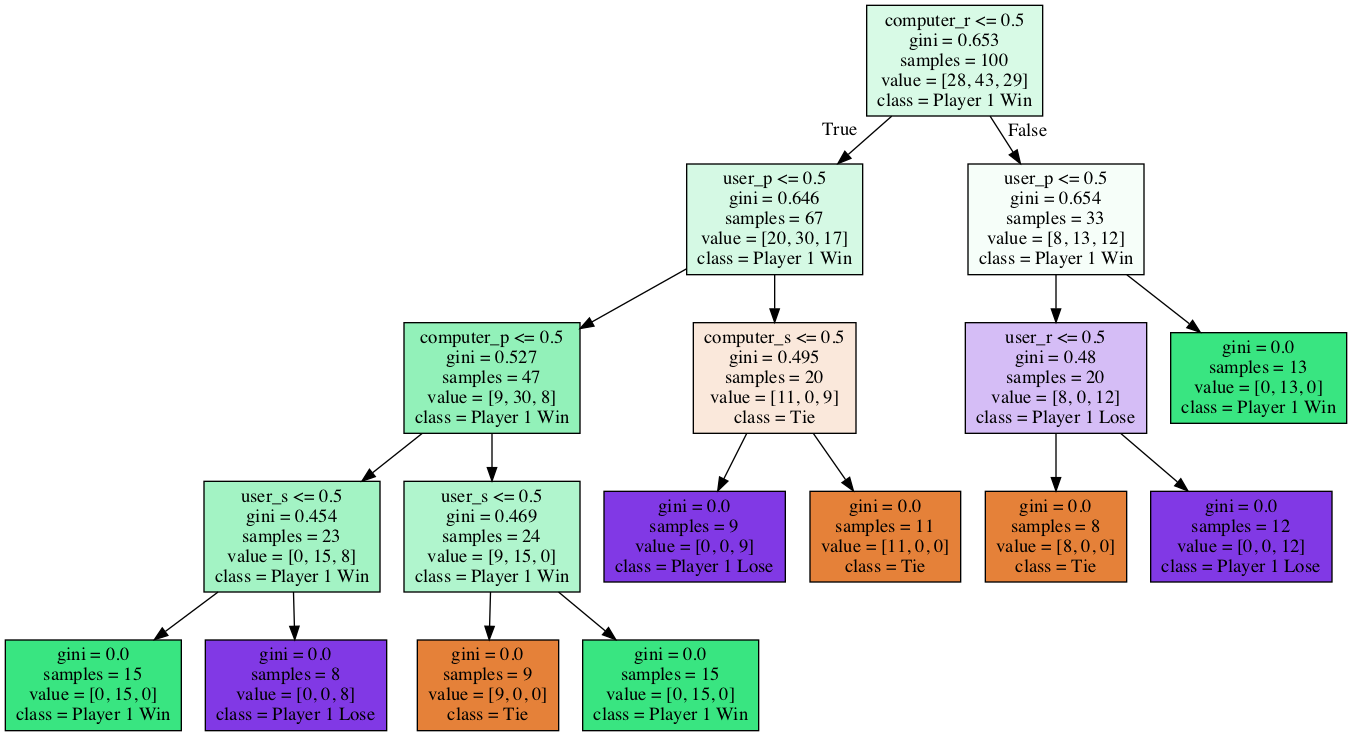

In [36]:
from IPython.display import Image
import pydotplus
dot_data=tree.export_graphviz(clf, feature_names=ohencoder.get_feature_names(['user', 'computer']), filled=True, class_names=y.unique())
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [25]:
game={'player_1': ['r'], 'player_2': ['s']}
# game_transformed=ohencoder.transform(pd.DataFrame(game))
game_transformed=ohencoder.transform([['r', 's']])
clf.predict(game_transformed)

array(['Player 1 Win'], dtype=object)

In [29]:
X

,player_1,player_2
0,p,p
1,s,p
2,s,r
3,s,r
4,r,r
...,...,...
95,s,r
96,r,s
97,s,p
98,r,r


In [33]:
# clf2=tree.DecisionTreeClassifier()
# clf.fit(X_lbtransformed, y)
# # transformed['predicted']=clf.predict(X_transformed)
# clf.predict(lbencoder.transform([['r', 's']]))